> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Medical Appointment No Shows-May-2016.CSV]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Dataset Description 

>We Have a dataset in a csv file that we will analyze.
### Question(s) for Analysis
>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, you will load the data, check for cleanliness, and then trim and clean the dataset for analysis. Let's save the data frame of the means for use in a notebook in the future.


### General Properties.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f1fd83100e4d4c6ca18395e8126900d8 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='epPtgGyrb9Wc5yOoQiVepOxeHYp45GbTBwurI5r4k6hV',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_f1fd83100e4d4c6ca18395e8126900d8.get_object(Bucket='t2-donotdelete-pr-wwcr5fakfxzjhw',Key='KaggleV2-May-2016.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#Explore the form of data
df.shape

(110527, 14)

The data consists of 110,527 rows (dates) and 14 columns

In [5]:
#   types and look for instances of missing or possibly errant data.
# 1/ check for duplications
df.duplicated().sum()

0

there is no identical duplication of the rows

In [6]:
#2/ check the number of unique values.
df['PatientId'].nunique()

62299

only 62299 out of 110527 are unique values

In [7]:
#to check the number of duplicated Patients Ids.
df['PatientId'].duplicated().sum()

48228

there is 48228 duplicated patient Id

In [8]:
#check the number of duplicated Patients Ids and Noshow
#To check if there are duplicate patient IDs but they are different in case of No-show
df.duplicated(['PatientId','No-show']).sum()

38710

There are 38,710 patient IDs with the same display status or not

In [9]:
#inspection for missing values or any issue to be handeled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing values

In [10]:
#Get some information about our data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


A description of the data found in terms of mean and max and min,To find out the data and are there errors, for example min age -1, and this is an error in recording the data because there is no negative age

In [11]:
#Define row index from -1 value for age.
t = (df.loc[df['Age'].isin(['-1'])])
t

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show



### Data Cleaning

In [12]:
#Removing the -1 value for age from dataset
df.drop(index=99832,inplace=True)

In [13]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [14]:
#correction of columns names.
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'No-show':'No_show'},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
# Remove duplicate identifiers with duplicate display state, leaving duplicate identifiers if the difference is in showing state
# Where the same patient may have several appointments to attend and be absent from others.
df.drop_duplicates(['PatientId','No_show'],inplace=True)
df.shape

(71816, 14)

## Data wrangling summary
After collecting the data from the csv file, we explored the first and last few rows of the dataset to its general aspects, then we showed the dimensions of our data, then we checked if there were any duplicate appointments, then we found out if there were duplicate patient identifiers and removed them,then we truned to data information like data types and if there is any missing data to handel,then we saw some figures about our data like[min,mean,max,etc],Finally we cleaned up our data by column names and dropping unnecessary data


<a id='eda'></a>
## Exploratory Data Analysis
Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section.



### Overview

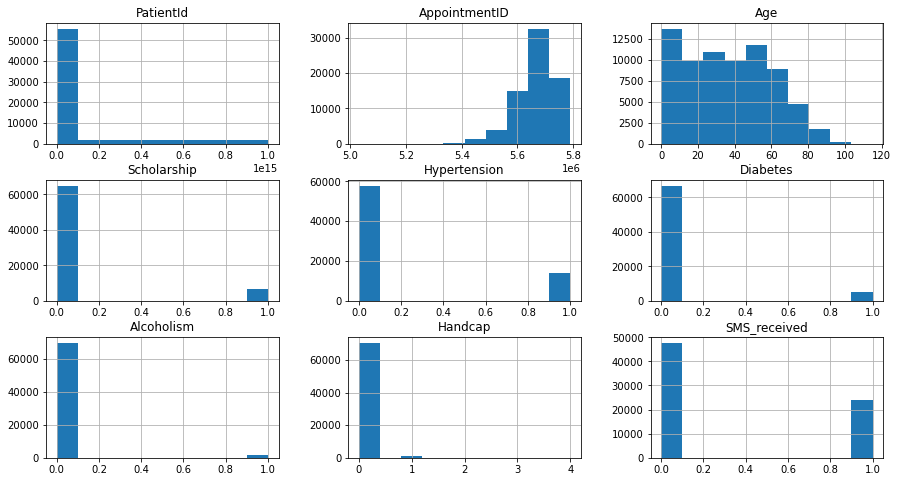

In [16]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(15,8));

In [17]:
df.No_show.value_counts()

No     54153
Yes    17663
Name: No_show, dtype: int64

In [18]:
plt.style.use('bmh')

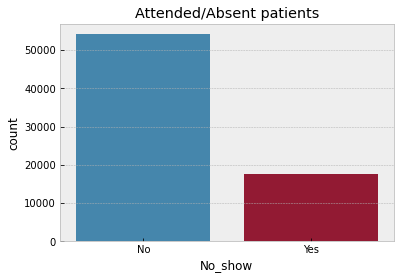

In [19]:
#dividing the patients to 2 groups depend on showing or not then exploring them
Attended=df.No_show=='No'
Absent=df.No_show=='Yes'
tmt= snb.countplot(x=df.No_show,data= df)
tmt.set_title('Attended/Absent patients')
plt.show()

The number of patients present (54,153) is three times greater than the absent (17,663)

In [20]:
n=df[Attended].mean()
n.Age

/tmp/wsuser/ipykernel_821/233106232.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  n=df[Attended].mean()


37.22916551252931

In [21]:
m=df[Absent].mean()
m.Age

/tmp/wsuser/ipykernel_821/3618082380.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  m=df[Absent].mean()


34.37626677234898

mean age for attend patients is 37,absent patients is 34

# does age affect the attendence ?

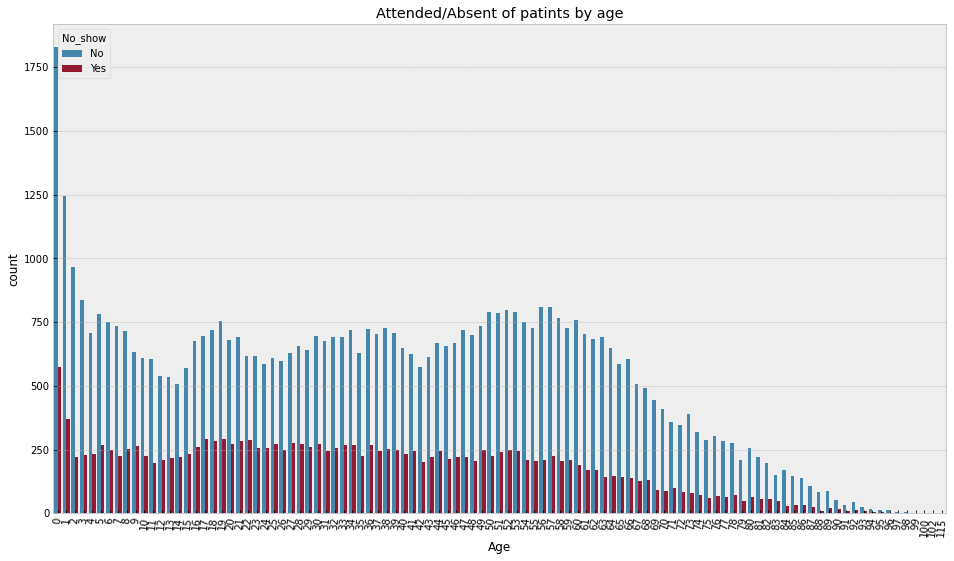

In [22]:
# does age affect the attendence 
plt.figure(figsize=(16,9))
plt.xticks(rotation=85)
tmt= snb.countplot(x=df.Age,hue=df.No_show,data=df)
tmt.set_title('Attended/Absent of patints by age')
plt.show()

age from[0,11] are the most showing In addition to from[45,56] and the least attending arr whom above 65 years old

In [23]:
k=df[Attended].groupby(['Hypertension','Diabetes']).mean()
k['Age']

Hypertension  Diabetes
0             0           30.713360
              1           53.701370
1             0           60.270517
              1           63.764303
Name: Age, dtype: float64

In [24]:
l=df[Absent].groupby(['Hypertension','Diabetes']).mean()
l['Age']

Hypertension  Diabetes
0             0           28.768691
              1           49.481172
1             0           58.650380
              1           62.913282
Name: Age, dtype: float64

mean age of non chronic diseases showing patients is 30 and non showing is 28 mean age of Hypertension Diabetes showing patients is around 64 and non showing is about 63 which means that there is a correiation between age and chronic diseases

# does age and chronic diseases affect the attendence together ?

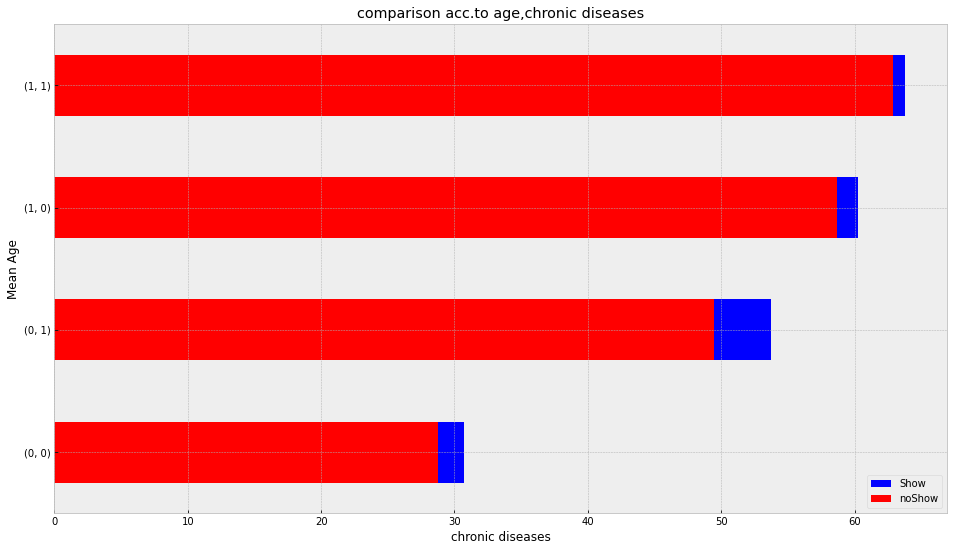

In [25]:
# does age and chronic diseases affect the attendence together
plt.figure(figsize=(16,9))#setting the figure size.
k['Age'].plot(kind='barh',color='blue',label='Show')
l['Age'].plot(kind='barh',color='red',label='noShow')
plt.legend();
plt.title('comparison acc.to age,chronic diseases')
plt.xlabel('chronic diseases')
plt.ylabel('Mean Age');

### Does gender affect attendance?

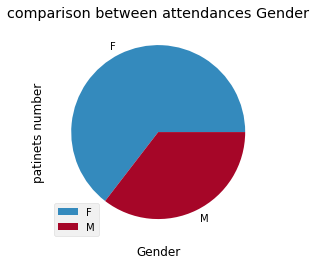

In [26]:
#What is the percentage of attendance of both sexes?
def attendance(df,col_name,show,noshow):
    plt.figure(figsize=(14,4))
    df[col_name][Attended].value_counts(normalize=True).plot(kind='pie',label='Show')
    plt.legend();
    plt.title('comparison between attendances Gender')
    plt.xlabel('Gender')
    plt.ylabel('patinets number');
attendance(df,'Gender',Attended,Absent)  

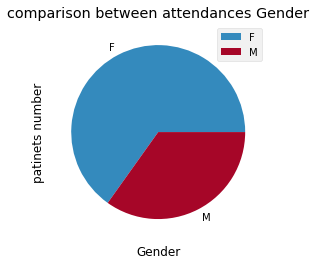

In [27]:
#What is the percentage of absent of both sexes?
def attendance(df,col_name,show,noshow):
    plt.figure(figsize=(14,4))
    df[col_name][Absent].value_counts(normalize=True).plot(kind='pie',label='noShow')
    plt.legend();
    plt.title('comparison between attendances Gender')
    plt.xlabel('Gender')
    plt.ylabel('patinets number');
attendance(df,'Gender',Attended,Absent)  

Gender has no obvious effect on attendance

## Conclusions
Neighbourhood has a great effect on attendence or not.

age from[0,11] are the most showing In addition to from[45,56] and the least attending arr whom above 65 years old

patients showing from specific Neighbourhood differ acc .to ages AEROPORTO then ILHAS OCEANICAS DE TRINDADE are with high ages attendance

Number of showing patients without receiving SMS is greater than showing patients with receiving SMS,which means that we need to revisit our SMS compaghin

## Specifics that I encountered
There is no clear correlation between the emergence of chronic diseases and gender and enrollment in the social welfare program



In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'Investigate_a_Dataset.ipynb' matched no files


255